<a href="https://colab.research.google.com/github/TheHammer007/Computational-Macro/blob/main/Robust_Beta_OLS_vs_RANSAC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Robust Beta Estimation: A Comparative Analysis of OLS and RANSAC**

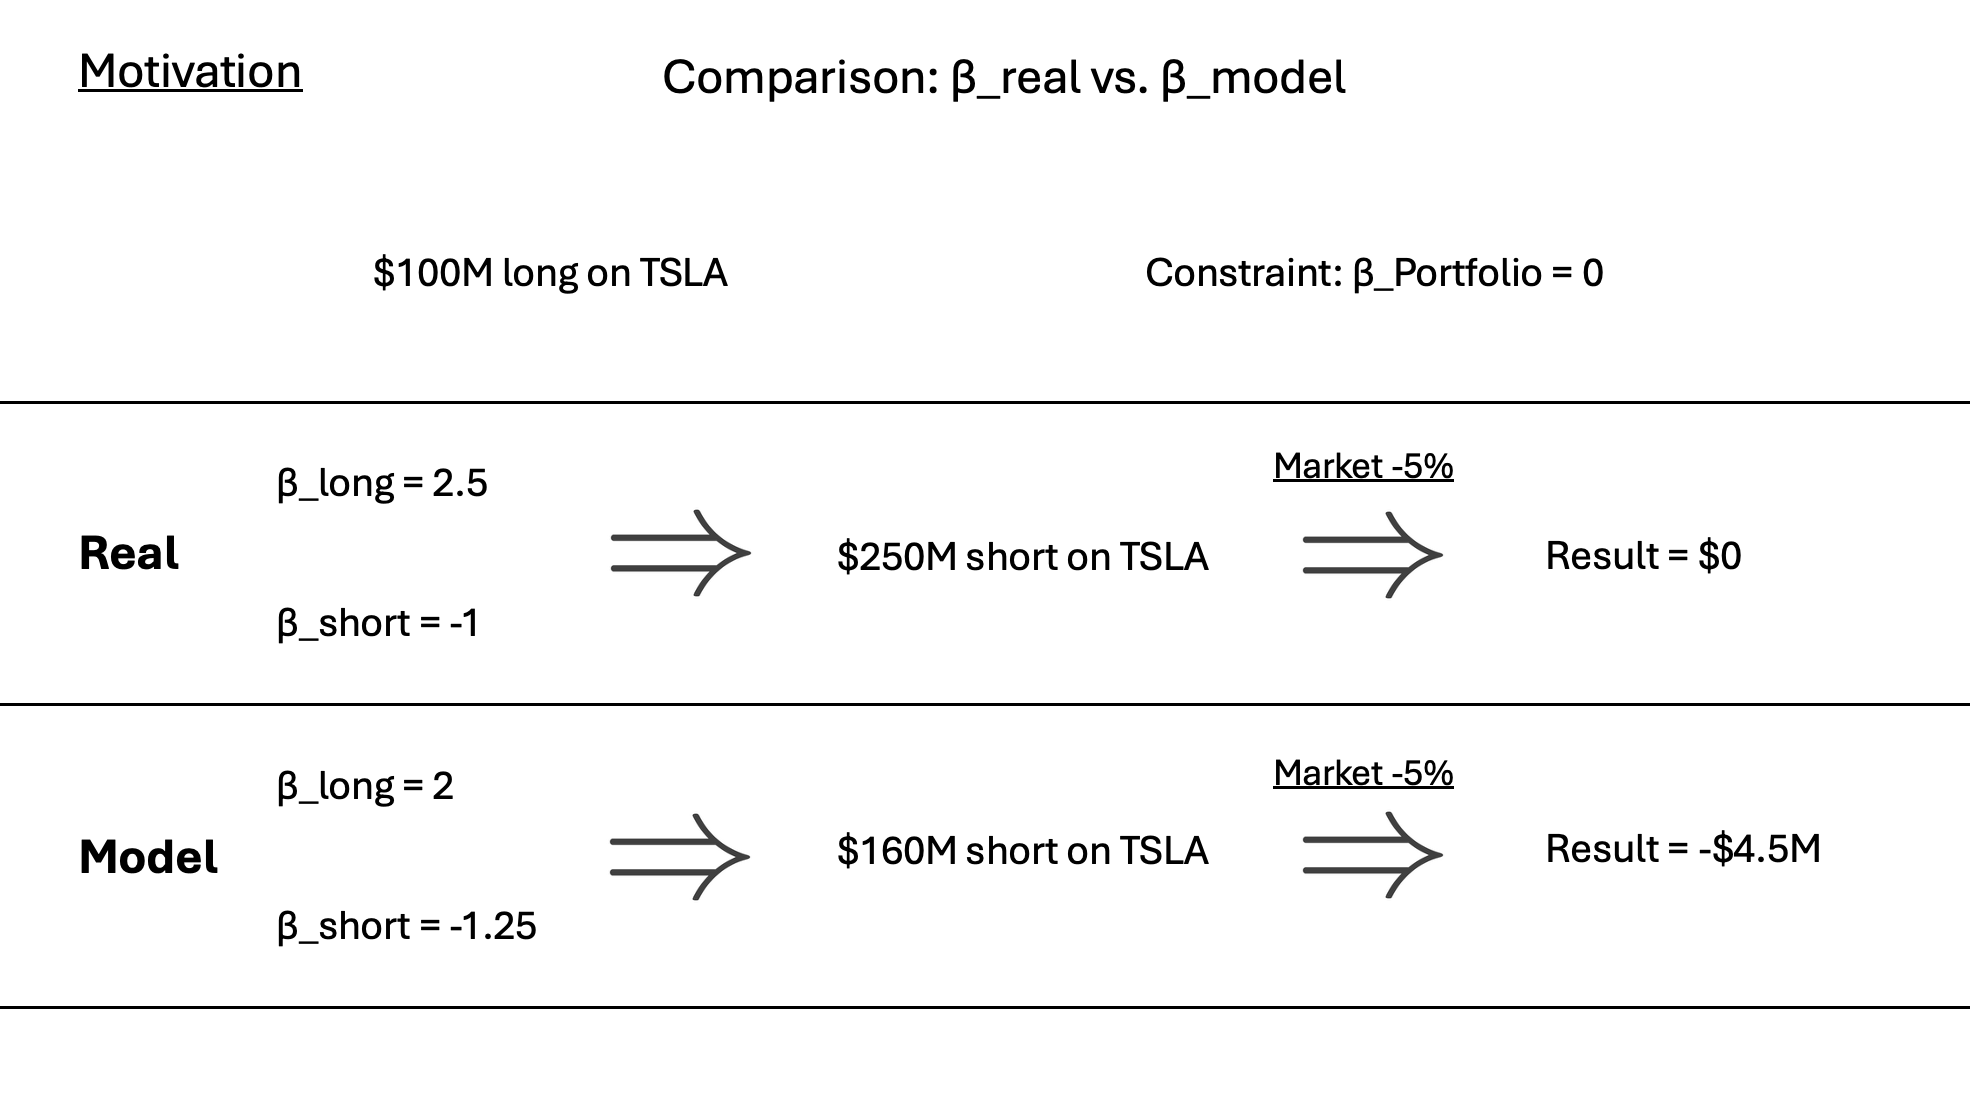

# **1. Theoretical Introduction**

In financial economics, the **beta (β) coefficient** measures how sensitive a security’s return is to movements in the overall market.  
It is a cornerstone of the **Capital Asset Pricing Model (CAPM)**, which links the expected return of an asset to its exposure to systematic risk.

According to the CAPM:

$$
E(R_i) = R_f + \beta_i \left( E(R_m) - R_f \right)
$$

**Where:**

- **E(Ri)** = expected return of asset *i*  
- **Rf** = risk-free rate  
- **E(Rm)** = expected return of the market portfolio  
- **βi** = sensitivity of asset *i* to market fluctuations  

A **beta greater than 1** indicates that the asset tends to **amplify market movements** (higher volatility), while a **beta lower than 1** suggests a more **defensive behavior**.  
For example, if **β = 1.2**, the stock is expected to rise or fall by **1.2%** for every **1%** movement in the market.


## OLS Estimation of Beta

In empirical analysis, β is typically estimated using **Ordinary Least Squares (OLS)** by fitting the linear regression:

$$
R_i - R_f = \alpha + \beta (R_m - R_f) + \varepsilon
$$

where both the asset and the market are expressed in **excess returns** over the risk-free rate.

The OLS estimator of beta is:

$$
\hat{\beta} = \frac{\text{Cov}(R_i, R_m)}{\text{Var}(R_m)}
$$

The method implicitly assumes:

- a **stable linear relationship** between asset and market  
- **normality** of returns  
- absence of extreme observations that distort the estimation  


## The Problem: Financial Returns Are Not Normal

Real-world financial markets often violate these assumptions.  
Returns typically exhibit:

- **fat tails**  
- **outliers**  
- **jumps caused by news, crises, or rare events**

Such extreme values can heavily influence the OLS estimate, making β:

- **unstable**,  
- **biased**, or even  
- **completely misleading**.


## Motivation for Robust Beta

To address these limitations, this project explores the concept of a **robust beta** —  
a measure of systematic risk designed to remain **stable and reliable even in the presence of extreme market events**.

By applying robust estimation techniques, we aim to capture the **true sensitivity** of a stock to the market **without being distorted by short-term anomalies**, crisis periods, or occasional outliers.


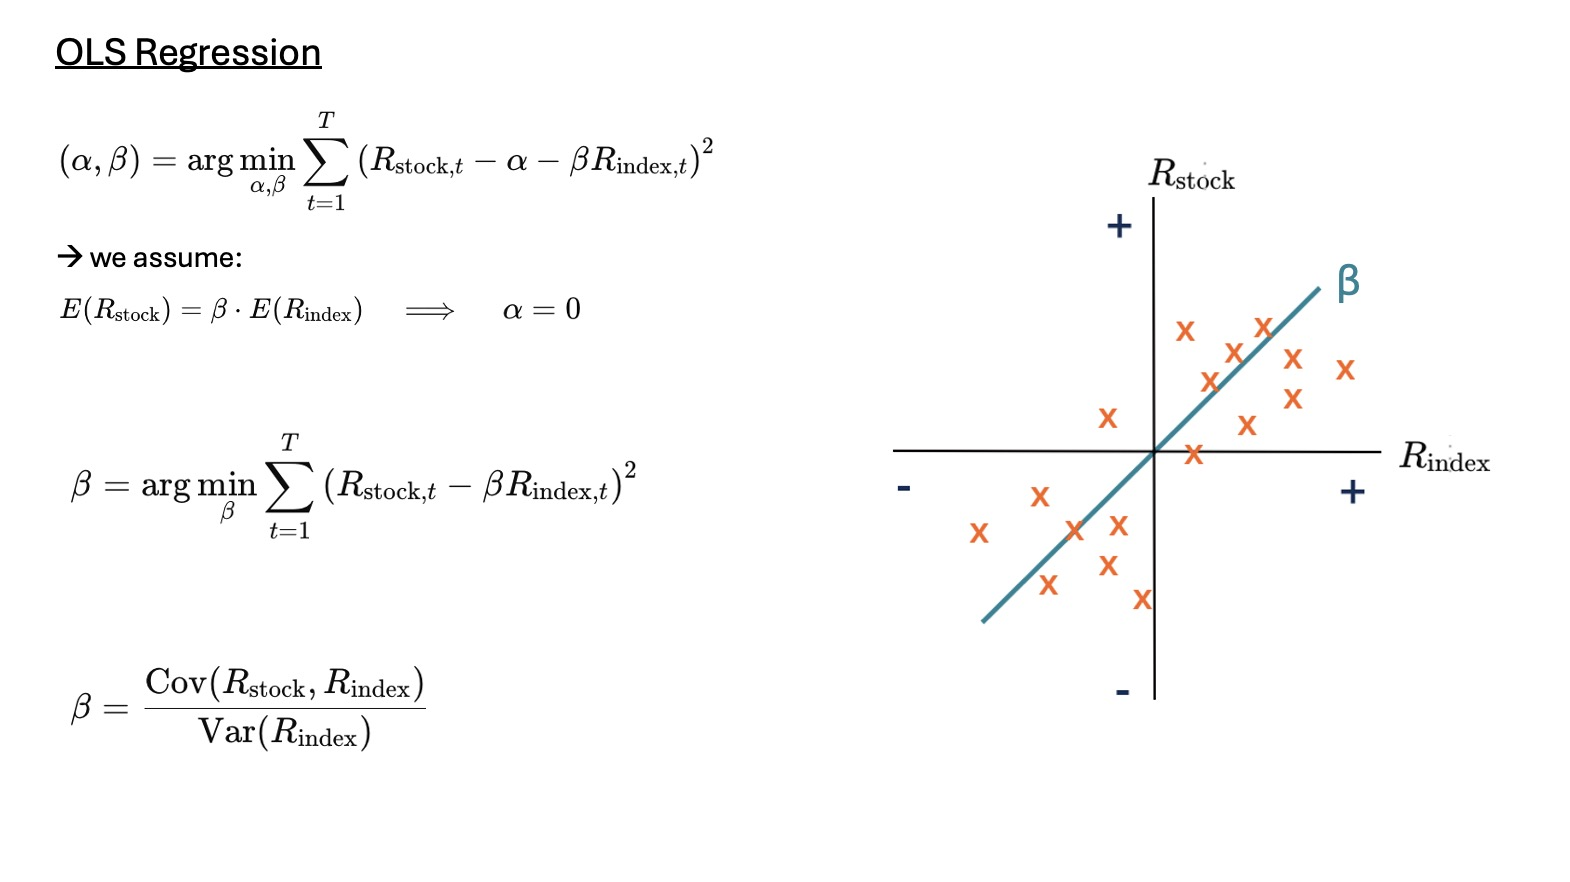

# **2. Explanation of Robust Measures**

In financial data analysis, returns frequently contain **outliers** — extreme observations produced by market shocks, news events, liquidity crises, or data errors.  
These values can significantly distort the results of a traditional **Ordinary Least Squares (OLS)** regression, because OLS minimizes the *sum of squared residuals*, giving **disproportionate weight to large errors**.

Formally, OLS solves:

$$
\min_{\alpha, \beta} \sum_{i=1}^{n} (y_i - \alpha - \beta x_i)^2
$$

This quadratic loss makes OLS **highly sensitive** even to a single anomalous point.  
To overcome this weakness, we turn to **robust regression methods**—estimators designed to remain stable when:

- the data are not normally distributed,  
- returns contain shocks or spikes,  
- extreme events influence only part of the sample.

Below we present the three main robust estimators considered in this project.


## 2.1 Huber Regression

The **Huber estimator** is a compromise between OLS and Least Absolute Deviations (LAD).  
It applies:

- a **quadratic penalty** to small residuals (like OLS),  
- a **linear penalty** to large residuals (like LAD).  

This limits the influence of extreme values while keeping smooth estimation for regular points.

The loss function is:

$$
\rho(u)=
\begin{cases}
\frac{1}{2}u^2, & |u| \le \delta \\
\delta \left(|u| - \frac{1}{2}\delta\right), & |u| > \delta
\end{cases}
$$

where **δ** is a threshold that determines when the transition from quadratic to linear penalty occurs.

Huber regression is:

- smoother than LAD,  
- less sensitive than OLS,  
- but still **partially affected** by large outliers.  

It is ideal when the dataset contains **moderate contamination**, not extremely heavy tails.

## 2.2 Theil–Sen Estimator

The **Theil–Sen estimator** is a non-parametric, rank-based method.  
It estimates the slope as the **median of all pairwise slopes**:

$$
\hat{\beta}_{TS} =
\text{median}\left(
\frac{y_i - y_j}{x_i - x_j}
\right),
\qquad i < j
$$

The intercept is then computed as the median of:

$$
y_i - \hat{\beta}_{TS} x_i
$$

Key features:

- extremely robust to outliers,  
- invariant to up to **29% arbitrary corruptions**,  
- captures a **central tendency** of the relationship,  
- slower on large datasets due to the combinatorial number of slopes.

Theil–Sen works very well when outliers are **isolated or sparse**, but it may struggle when extreme events appear in **clusters**, as in financial crises.

## 2.3 RANSAC (Random Sample Consensus)

We adopt **RANSAC** as the primary robust measure of beta in this project.

RANSAC differs from the previous methods because it does **not** smooth outliers or reduce their weight—  
it **actively identifies and excludes them**.

### How RANSAC works

RANSAC iteratively performs the following steps:

1. **Randomly selects a small subset** of the data.  
2. **Fits a regression** to that minimal subset  
3. **Tests all remaining points**, classifying them as:  
   - **inliers** → points consistent with the model  
   - **outliers** → points too far from the model  
4. Repeats many times and keeps the model that yields the **largest number of inliers**.

The final regression is then estimated **only on the inlier set**, ignoring all other observations.

### Why RANSAC is ideal for financial data

Financial returns tend to show:

- **fat tails**,  
- **clusters of extreme values**,  
- **shocks persisting for multiple days**,  
- **non-Gaussian behavior during crisis periods**.

RANSAC is particularly suited for such data because:

- It tolerates **high percentages of outliers** (10–20% or more).  
- It can identify and discard **clusters of abnormal points**, not only isolated outliers.  
- It produces a **crisis-resistant beta**, driven by the stable majority of observations.  
- It does not rely on strong distributional assumptions (e.g., normality).

Compared to Huber and Theil–Sen, RANSAC offers the **highest level of robustness**, because it removes outliers entirely rather than down-weighting them.


# Conclusion: Why We Choose RANSAC Beta

Robust regression techniques allow us to estimate a beta that is:

- **more stable**,  
- **less sensitive to extreme events**,  
- **closer to the true systematic risk** of an asset.

Among the alternatives, **RANSAC provides the strongest protection against outliers**, especially when contamination is **large, non-Gaussian, and clustered**—a typical characteristic of real financial time series.

For these reasons, **RANSAC will be used as the primary robust beta estimator throughout the empirical analysis**.


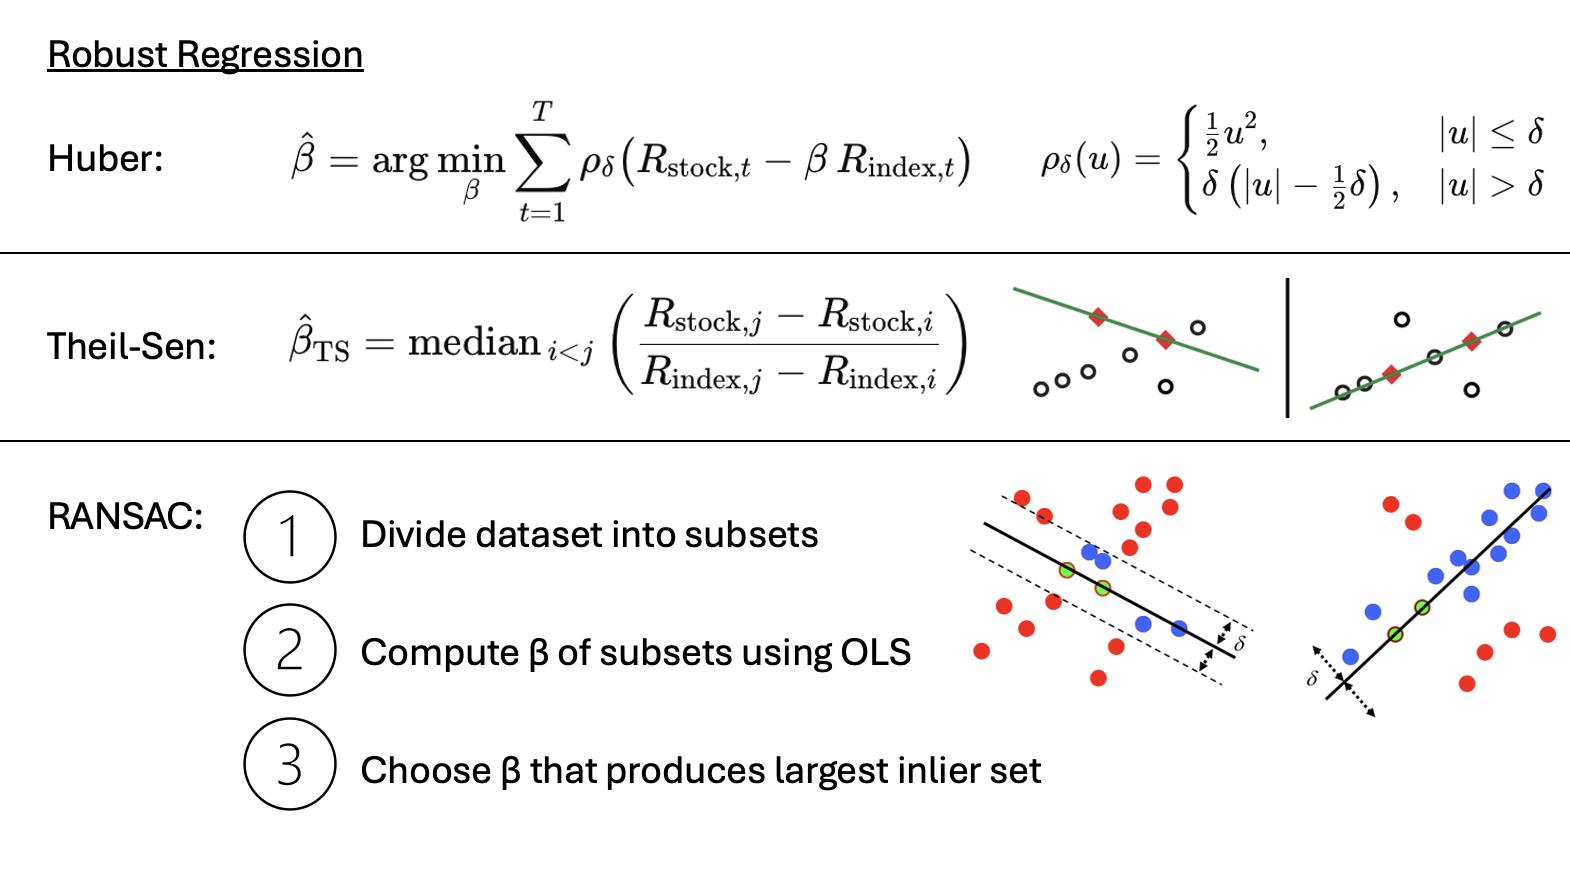

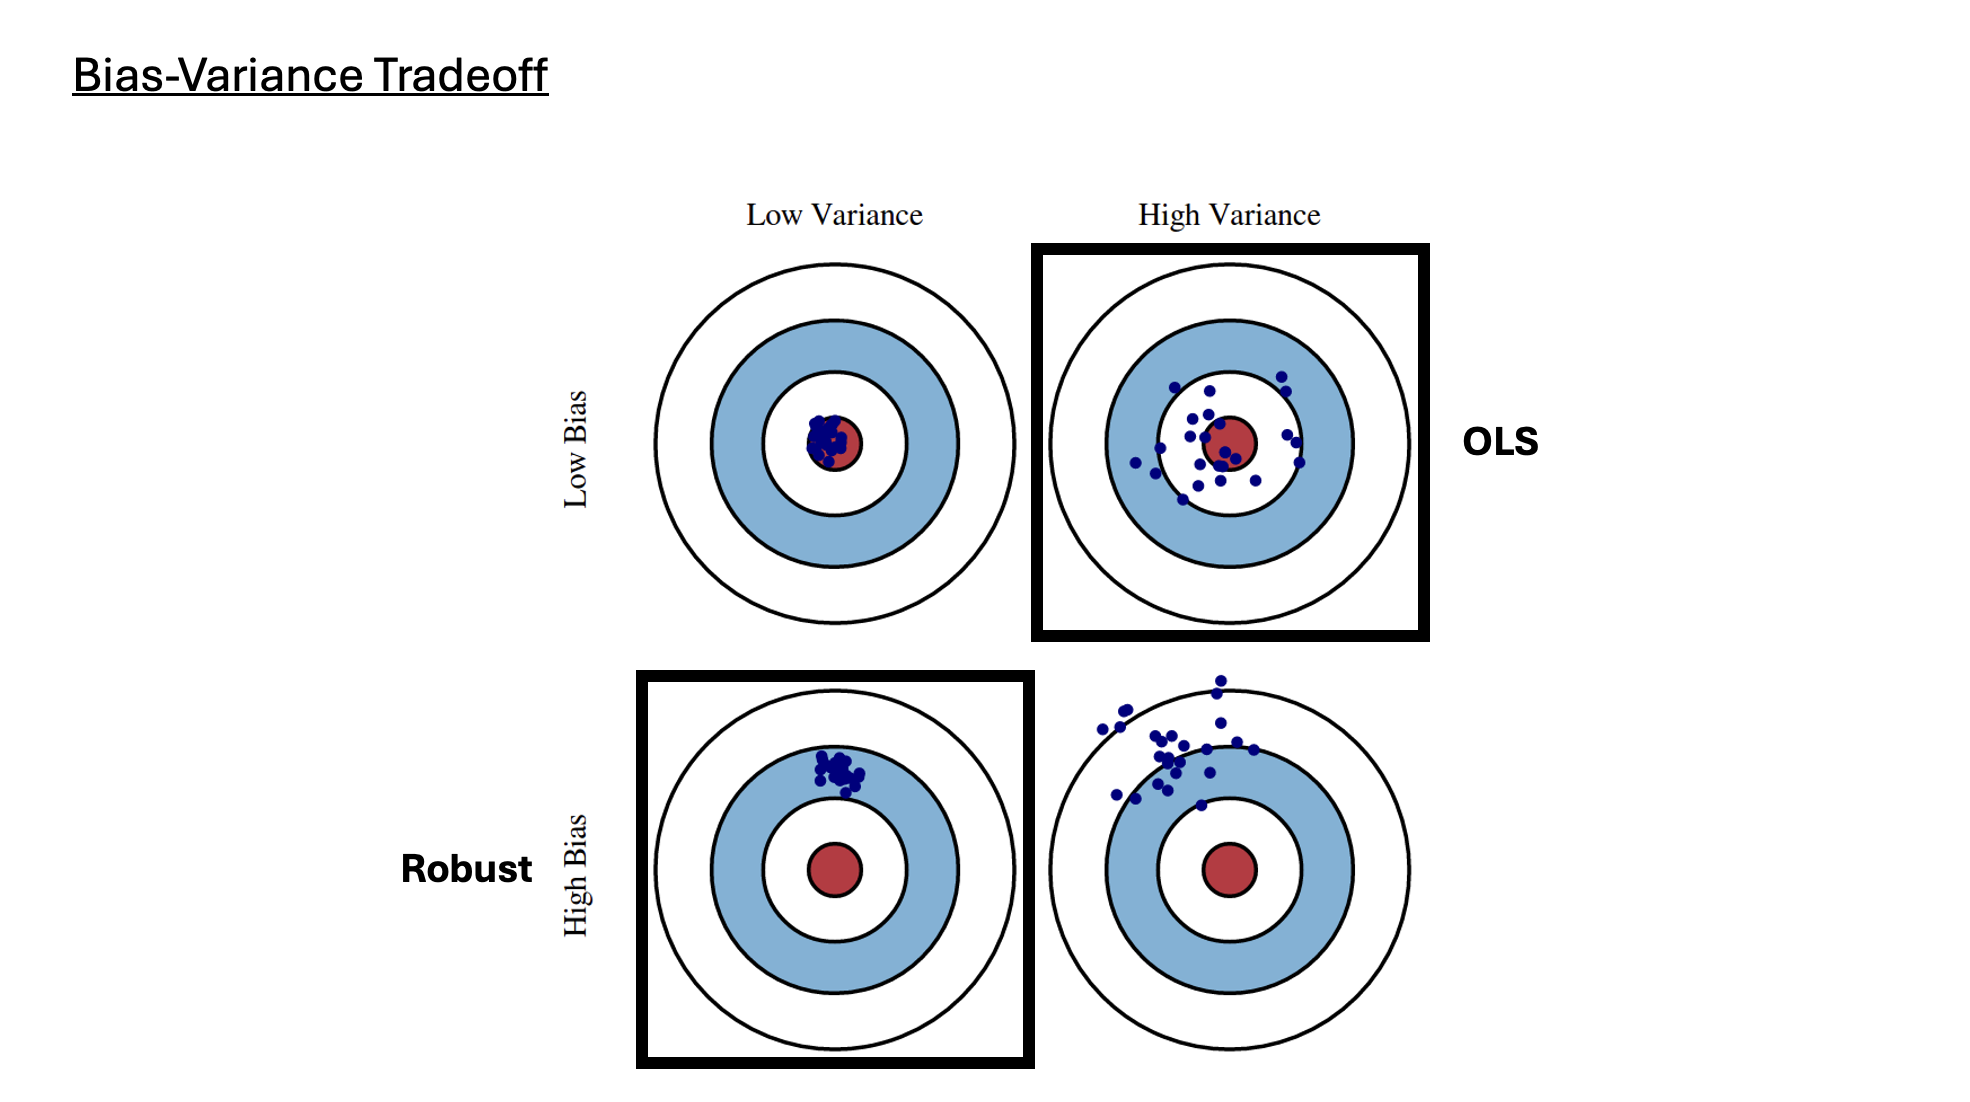

# **3. What Should We Expect?**

## 3.1 Simulating Synthetic Financial Data

Before analysing real financial time series, it is useful to understand how our methodology behaves in a controlled environment.  
To do this, we start by generating synthetic data where the **true beta is known**, allowing us to compare:

- the traditional OLS beta (sensitive to outliers)  
- the RANSAC beta (designed to be robust)

The simulation is structured in **two steps**:

1. **Comparison between two synthetic stocks**  
   - Stock A with *0.25%* outliers  
   - Stock B with *10%* outliers  

2. **Comparison between two market regimes**  
   - A calm, low-volatility period  
   - A crisis, high-volatility period with heavy contamination  


### Structure of the Simulation

Each simulated dataset is built using:

- 2500 daily observations  
- a true beta equal to 1.50  
- market volatility of 1.2%  
- idiosyncratic stock volatility of 1.0%  

The clean, uncontaminated returns follow a simple linear model:

$$
y = beta_t · x + ε
$$


where:

- x is drawn from a normal distribution with volatility σₓ  
- ε is random noise drawn from a normal distribution with volatility σε  

This represents an ideal situation in which the stock moves proportionally to the market plus idiosyncratic noise.


### Introducing Outliers

Financial returns often contain **irregular and extreme observations**, so the simulation introduces two types of anomalies.

### 1. Vertical Outliers on Stock Returns (Y)

These mimic:

- firm-specific news  
- sudden jumps  
- idiosyncratic shocks  

They are generated by adding unusually large noise to random values of y.

### 2. Leverage Outliers on Market Returns (X)

These mimic:

- macroeconomic surprises  
- liquidity shocks  
- abnormal market behaviour  

They are produced by adding large values to random points in x.

To reproduce realistic conditions, the total fraction of outliers is divided as follows:

- 75% → vertical outliers in y  
- 25% → leverage outliers in x  

Two scenarios are generated:

- **Stock A:** very small fraction of outliers (0.25%)
- **Stock B:** large fraction of outliers (10%)

This allows us to examine how increasing contamination affects beta estimation.


### Why Outliers Matter

Outliers can strongly distort the OLS regression line.

OLS minimizes the squared residuals:

$$
Σ (yᵢ − β xᵢ)²
$$


Therefore, extreme observations receive **disproportionate weight**, often resulting in:

- a biased beta  
- a rotated regression line  
- misleading conclusions  

The synthetic experiment lets us observe exactly how OLS reacts to contamination and how RANSAC avoids these distortions.


### Calm vs Crisis Scenario

Alongside the stock-based simulation, we also simulate two distinct market regimes:

### Calm Period

- low volatility  
- very few outliers (0.5%)  
- stable relationship between stock and market  

### Crisis Period

- market volatility increases more than six-fold  
- heavy contamination (15% outliers)  
- two types of extreme shocks:

1. **Extreme negative stock events**  
   - between −15% and −5%

2. **Extreme leverage outliers**  
   - unusually large values simultaneously in x and y  

The underlying model remains the same:

$$
y = beta_t · x + ε
$$


but the environment becomes much more unstable, allowing us to compare how OLS and RANSAC behave under market stress.


### Why the Simulation Focuses on RANSAC

The primary goal of the simulation is to evaluate whether RANSAC yields a **more reliable and crisis-resistant beta**.

RANSAC is particularly suitable because it:

- identifies and removes outliers rather than down-weighting them  
- remains stable even when a large share of observations is corrupted  
- isolates the “consensus” relationship between stock and market  
- captures the true systematic component without being distorted by rare anomalies  

This property is crucial in financial data, where extreme values are common and can heavily influence classical estimators.

Overall, the simulation serves as a **controlled laboratory** that demonstrates why a robust estimator such as RANSAC is essential when analysing financial time series, both in normal conditions and during crisis periods.


### Before running the simulations and the empirical analysis, we import the necessary Python libraries.  
Each library serves a specific purpose:

- **NumPy**: efficient numerical computations and random number generation (used to simulate returns).  
- **Pandas**: dataset creation, manipulation, and time-series indexing.  
- **yfinance**: downloading real financial data from Yahoo Finance.  
- **Matplotlib**: visualising scatter plots, beta lines, and comparisons.  
- **SciPy (t-distribution)**: conducting statistical tests on beta differences.  
- **scikit-learn’s RANSACRegressor**: performing robust regression that detects and removes outliers.

These tools provide the computational framework for both the synthetic simulations and the analysis of real market data.


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.linear_model import RANSACRegressor, LinearRegression

# Core Functions Used Throughout the Analysis

### Function to Compute Daily Returns  
To work with real financial data, we define a simple utility function that downloads historical prices through *yfinance* and computes **daily log-returns**, producing a clean return series for our regressions.


In [ ]:
## compute returns of index and stocks

def rReturn(stock_name, start_date, end_date):
  stock_ticker = yf.Ticker(stock_name)
  stock_df = stock_ticker.history(start=start_date, end=end_date)
  stock_df["daily price"] = stock_df["Close"]
  stock_df['daily return'] = np.log(stock_df['daily price'] / stock_df['daily price'].shift(1))
  return stock_df['daily return'].dropna()

### Computing the Residual Standard Error (RSE)  
To assess the quality of a beta estimate, we compute the **Residual Standard Error (RSE)**, which measures how much the actual stock returns deviate from the returns predicted by the model. A smaller RSE indicates a tighter and more reliable fit.

In [ ]:
def rse(index_return, stock_return, beta_index_stock):

    modeled_return_stock = beta_index_stock * index_return
    residuals_stock = stock_return - modeled_return_stock
    rse_stock = residuals_stock.std()
    return rse_stock


### OLS and RANSAC Beta Estimators  
Next, we define the two core estimators used throughout the analysis.  
The first computes the **classical OLS beta**, while the second implements the **RANSAC-based robust beta**, which identifies inliers and excludes anomalous points before estimating the slope.


In [ ]:
def ols_beta(index_return, stock_return, full=False):

    # put the series together and remove NaNs
    r = pd.concat([index_return.rename("x"), stock_return.rename("y")], axis=1).dropna()
    x = r["x"].values
    y = r["y"].values
    n = len(x)

    # means
    x_mean = x.mean()
    y_mean = y.mean()

    # Sxx and Sxy
    Sxx = np.sum((x - x_mean)**2)
    Sxy = np.sum((x - x_mean)*(y - y_mean))

    # beta estimate
    beta_hat = Sxy / Sxx

    if not full:
        return beta_hat

    # intercept
    alpha_hat = y_mean - beta_hat * x_mean

    # residuals
    y_hat = alpha_hat + beta_hat * x
    resid = y - y_hat

    # residual variance
    sigma2_hat = np.sum(resid**2) / (n - 2)

    # standard error of beta
    se_beta = np.sqrt(sigma2_hat / Sxx)

    return beta_hat, se_beta, n

def ransac_beta(index_return, stock_return,
                full=False,
                max_trials=100,
                random_state=42):

    # put the series together and remove NaNs
    r = pd.concat([index_return.rename("x"), stock_return.rename("y")], axis=1).dropna()
    X_all = r["x"].values.reshape(-1, 1)
    y_all = r["y"].values

    base = LinearRegression(fit_intercept=False)
    ransac = RANSACRegressor(
        estimator=base,
        min_samples=0.5,
        residual_threshold=None,   # automatic threshold
        max_trials=max_trials,
        random_state=random_state
    )
    ransac.fit(X_all, y_all)

    beta_hat = float(ransac.estimator_.coef_[0])

    if not full:
        return beta_hat

    # inliers / outliers
    inliers = ransac.inlier_mask_
    X = X_all[inliers, 0]
    y = y_all[inliers]
    n = len(X)

    # residuals on inliers
    resid = y - beta_hat * X

    # residual variance
    sigma2_hat = np.sum(resid**2) / (n - 1)
    # standard error of beta
    se_beta = np.sqrt(sigma2_hat / np.sum(X**2))

    return beta_hat, se_beta, n, inliers, ransac


### Plotting OLS vs RANSAC Beta  
This visualization compares the traditional OLS beta with the robust RANSAC beta.  
The plot also reports how many observations RANSAC classifies as outliers, giving a clear sense of how much contamination is present in the data.


In [ ]:
def plot_beta_all(index_return, stock_return, stock_name, index_name="S&P 500"):

    # Prepare data
    r = pd.concat([index_return.rename("x"), stock_return.rename("y")], axis=1).dropna()
    x, y = r["x"].values, r["y"].values
    n = len(r)

    # OLS beta
    beta_ols = ols_beta(r["x"], r["y"])

    # RANSAC beta + inlier mask
    beta_rans, se_rans, n_rans, inliers, ransac_model = ransac_beta(
        r["x"], r["y"], full=True
    )

    # Outlier count and percentage
    outliers = (~inliers).sum()
    outlier_pct = outliers / n * 100

    # Summary table (betas only)
    summary = pd.DataFrame({
        "β":                  [beta_ols,                 beta_rans],
        "β_OLS - β_RANSAC":   [beta_ols - beta_rans,     beta_rans - beta_ols]
    }, index=["OLS", "RANSAC"]).round(4)

    print(f"\n{'='*60}")
    print(f"Static Beta Estimates - {stock_name} vs {index_name}")
    print(f"{'='*60}")
    print(summary)

    # ---- Hypothesis test: H0: β_OLS = β_RANSAC ----
    test_res = test_diff_beta(r["x"], r["y"], alpha=0.02, verbose=False)

    print("\nHypothesis Test: H0: β_OLS = β_RANSAC")
    print(test_res["decision_str"])

    # Grid for lines
    x_grid = np.linspace(x.min(), x.max(), 200)

    fig, ax = plt.subplots(figsize=(8, 5))

    # Scatter points
    ax.scatter(x, y, alpha=0.5, label=f"{stock_name} returns", s=12)

    # OLS line
    ax.plot(x_grid, beta_ols * x_grid,
            color="blue",
            label=f"OLS β = {beta_ols:.3f}")

    # RANSAC line
    ax.plot(x_grid, beta_rans * x_grid,
            color="orange", linestyle="-.",
            label=f"RANSAC β = {beta_rans:.3f}")

    # Labels and title
    ax.set_xlabel(f"{index_name} returns")
    ax.set_ylabel(f"{stock_name} returns")
    ax.set_title(
        f"OLS vs RANSAC: {stock_name} vs {index_name}\n"
        f"Outliers detected: {outliers} ({outlier_pct:.2f}%)"
    )

    # Legend + grid
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


### Crisis vs Calm Beta Analysis — Function Overview

This function compares a stock’s beta during a **calm** and a **crisis** period using both **OLS** and **RANSAC** regressions. It produces side-by-side scatter plots with inliers/outliers,  
calculates beta estimates for each period, and performs a hypothesis test  
(*H0: β_OLS = β_RANSAC*) to assess whether the two methods significantly differ.


In [ ]:
def analyze_crisis_vs_calm_periods(
    stock_return,
    index_return,
    stock_name,
    index_name,
    calm_start,
    calm_end,
    crisis_start,
    crisis_end
):

    # Prepare data
    data_crisis = pd.concat([
        index_return.loc[crisis_start:crisis_end],
        stock_return.loc[crisis_start:crisis_end]
    ], axis=1).dropna()
    data_crisis.columns = [index_name, stock_name]

    data_calm = pd.concat([
        index_return.loc[calm_start:calm_end],
        stock_return.loc[calm_start:calm_end]
    ], axis=1).dropna()
    data_calm.columns = [index_name, stock_name]

    # CRISIS: OLS
    beta_ols_crisis, se_ols_crisis, n_ols_crisis = ols_beta(
        data_crisis[index_name], data_crisis[stock_name], full=True
    )
    x_mean_c = data_crisis[index_name].mean()
    y_mean_c = data_crisis[stock_name].mean()
    alpha_ols_crisis = y_mean_c - beta_ols_crisis * x_mean_c

    # CRISIS: RANSAC
    beta_ran_crisis, se_ran_crisis, n_ran_crisis, inlier_crisis, ransac_crisis = ransac_beta(
        data_crisis[index_name], data_crisis[stock_name], full=True
    )
    outlier_crisis = ~inlier_crisis

    # CALM: OLS
    beta_ols_calm, se_ols_calm, n_ols_calm = ols_beta(
        data_calm[index_name], data_calm[stock_name], full=True
    )
    x_mean_t = data_calm[index_name].mean()
    y_mean_t = data_calm[stock_name].mean()
    alpha_ols_calm = y_mean_t - beta_ols_calm * x_mean_t

    # CALM: RANSAC
    beta_ran_calm, se_ran_calm, n_ran_calm, inlier_calm, ransac_calm = ransac_beta(
        data_calm[index_name], data_calm[stock_name], full=True
    )
    outlier_calm = ~inlier_calm

    # PLOTS
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # CRISIS PLOT
    ax1 = axes[0]

    ax1.scatter(
        data_crisis[index_name][inlier_crisis],
        data_crisis[stock_name][inlier_crisis],
        alpha=0.6, s=40, color='steelblue', label=f'Inliers'
    )

    ax1.scatter(
        data_crisis[index_name][outlier_crisis],
        data_crisis[stock_name][outlier_crisis],
        alpha=0.9, s=50, color='red', marker='x', label=f'Outliers'
    )

    x_range_crisis = np.linspace(
        data_crisis[index_name].min(),
        data_crisis[index_name].max(),
        100
    )

    y_ols_crisis = alpha_ols_crisis + beta_ols_crisis * x_range_crisis
    y_rans_crisis = beta_ran_crisis * x_range_crisis

    ax1.plot(x_range_crisis, y_ols_crisis, 'b-', linewidth=2.5,
             label=f'OLS β={beta_ols_crisis:.3f}')
    ax1.plot(x_range_crisis, y_rans_crisis, 'orange', linestyle='--', linewidth=2.5,
             label=f'RANSAC β={beta_ran_crisis:.3f}')

    ax1.set_title("CRISIS PERIOD", fontsize=12, fontweight='bold', color='darkred')
    ax1.set_xlabel(f"{index_name} returns")
    ax1.set_ylabel(f"{stock_name} returns")
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # CALM PLOT
    ax2 = axes[1]

    ax2.scatter(
        data_calm[index_name][inlier_calm],
        data_calm[stock_name][inlier_calm],
        alpha=0.6, s=40, color='steelblue', label=f'Inliers'
    )

    ax2.scatter(
        data_calm[index_name][outlier_calm],
        data_calm[stock_name][outlier_calm],
        alpha=0.9, s=50, color='red', marker='x', label=f'Outliers'
    )

    x_range_calm = np.linspace(
        data_calm[index_name].min(),
        data_calm[index_name].max(),
        100
    )

    y_ols_calm = alpha_ols_calm + beta_ols_calm * x_range_calm
    y_rans_calm = beta_ran_calm * x_range_calm

    ax2.plot(x_range_calm, y_ols_calm, 'b-', linewidth=2.5,
             label=f'OLS β={beta_ols_calm:.3f}')
    ax2.plot(x_range_calm, y_rans_calm, 'orange', linestyle='--', linewidth=2.5,
             label=f'RANSAC β={beta_ran_calm:.3f}')

    ax2.set_title("CALM PERIOD", fontsize=12, fontweight='bold', color='darkgreen')
    ax2.set_xlabel(f"{index_name} returns")
    ax2.set_ylabel(f"{stock_name} returns")
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # SUMMARY

    print("\n" + "="*80)
    print(f"OLS vs RANSAC β comparison ({stock_name} vs {index_name})")
    print("="*80)

    # Crisis test
    res_crisis = test_diff_beta(
        data_crisis[index_name], data_crisis[stock_name], alpha=0.05, verbose=False
    )
    print(f"\nCRISIS PERIOD ({crisis_start} → {crisis_end}):")
    print(f"  OLS β    = {beta_ols_crisis:.4f}")
    print(f"  RANSAC β = {beta_ran_crisis:.4f}")
    print(f"  Hypothesis test: H0: β_OLS = β_RANSAC")
    print(f"    p-value = {res_crisis['p_value']:.4f}")
    print(f"    {res_crisis['decision_str']}")

    # Calm test
    res_calm = test_diff_beta(
        data_calm[index_name], data_calm[stock_name], alpha=0.05, verbose=False
    )
    print(f"\nCALM PERIOD ({calm_start} → {calm_end}):")
    print(f"  OLS β    = {beta_ols_calm:.4f}")
    print(f"  RANSAC β = {beta_ran_calm:.4f}")
    print(f"  Hypothesis test: H0: β_OLS = β_RANSAC")
    print(f"    p-value = {res_calm['p_value']:.4f}")
    print(f"    {res_calm['decision_str']}")

    print("="*80)


### Simulating Synthetic Stock and Market Returns  
This function creates artificial financial data with a known true beta.  
It generates clean index and stock returns and then injects controlled outliers—both vertical (on the stock) and leverage (on the index)—to mimic real-world market anomalies.  
The output is a pair of time series ready to be used for testing OLS and RANSAC beta estimation.


In [ ]:
def simulate_stock(frac_outliers, k_multiplier, scenario_name, seed=42):

    np.random.seed(seed)
    n = 2500
    beta_true = 1.50
    sigma_x = 0.012
    sigma_eps = 0.010

    # fraction of outliers allocated to Y (vertical) and X (leverage)
    frac_y_out = frac_outliers * 0.75
    frac_x_out = frac_outliers * 0.25
    k_y = k_multiplier
    k_x = k_multiplier * 1.5

    # generate clean data
    x = np.random.normal(0, sigma_x, size=n)
    eps = np.random.normal(0, sigma_eps, size=n)
    y = beta_true * x + eps

    # vertical outliers on Y
    idx_y = np.random.choice(n, int(frac_y_out * n), replace=False)
    y[idx_y] += np.random.normal(0, k_y * sigma_eps, size=len(idx_y))

    # leverage outliers on X
    idx_x = np.random.choice(n, int(frac_x_out * n), replace=False)
    x[idx_x] += np.random.normal(0, k_x * sigma_x, size=len(idx_x))

    # build time index
    dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
    index_return = pd.Series(x, index=dates, name="index")
    stock_return = pd.Series(y, index=dates, name="stock")

    print(f"\n{scenario_name} - Simulated data generated:")
    print(f"  Total outliers: {frac_outliers*100:.2f}% | True beta: {beta_true:.2f}")

    return index_return, stock_return, beta_true


### Statistical Test: Comparing OLS Beta vs. RANSAC Beta  
This function performs a formal hypothesis test to check whether the beta estimated with OLS differs significantly from the robust beta obtained through RANSAC.

The null hypothesis is:

**H₀: β₍OLS₎ = β₍RANSAC₎**

and the alternative:

**H₁: β₍OLS₎ ≠ β₍RANSAC₎**


### **How the Test Works**

OLS and RANSAC both estimate a slope coefficient (beta), but:

- **OLS uses all observations**, including outliers  
- **RANSAC uses only inliers**, discarding extreme values  

Because the two betas come from (potentially) different sample sizes and different subsets of data, we do **not** know their exact sampling distributions.

However, we can still perform an approximate hypothesis test thanks to the **Central Limit Theorem (CLT)**.


### **Why We Can Use a t-Test (Even Without Knowing the Exact Distribution)**

Under fairly general conditions, the CLT tells us that:

- the sampling distribution of an estimator becomes **approximately normal** when the sample size is sufficiently large  
- this holds even for robust estimators like RANSAC, provided the number of inliers is large enough  
- the difference between two independent (or weakly dependent) estimators is also approximately normal  

Therefore:

> **β₍OLS₎ − β₍RANSAC₎ is approximately normally distributed**  
> when both estimators are based on sufficiently many data points.

This means we can construct the t-statistic:

$$
t = \frac{β_{OLS} - β_{RANSAC}}{\sqrt{SE(β_{OLS})^2 + SE(β_{RANSAC})^2}}
$$

using the fact that the variance of a difference is the sum of variances (assuming independence or low correlation between estimators).


### **Approximating Degrees of Freedom**

Because OLS and RANSAC use different sample sizes, we approximate the degrees of freedom conservatively as:

- **n₍OLS₎ – 2** for OLS (intercept + slope)  
- **n₍RANSAC₎ – 1** for RANSAC (slope only)  

and take:

$$
df = \min(df_{OLS},\, df_{RANSAC})
$$

This provides a safe (slightly conservative) test.


### **Interpreting the Result**

Based on the p-value:

- **If p < α (0.05)** → reject H₀  
  - the two betas are statistically different  
  - OLS likely suffers from outlier-induced bias  

- **If p ≥ α** → do not reject H₀  
  - the difference is not statistically significant  
  - OLS and RANSAC give similar results  

The function prints a clear summary table and the full test outcome, allowing us to quantify how much outliers distort the classical beta estimation.

This offers a rigorous way to validate whether RANSAC truly provides a more reliable estimate than OLS in noisy or contaminated financial datasets.


In [ ]:
from scipy.stats import t
import numpy as np

def test_diff_beta(index_return, stock_return, alpha=0.05, verbose=False):
    """
    Test H0: β_OLS = β_RANSAC.

    Returns:
      - p_value
      - reject_H0  (True/False)
      - decision_str (final sentence in English)
      - plus support info (beta_ols, beta_rans, diff, t, df)
    """

    # Full estimates
    beta_ols, se_ols, n_ols = ols_beta(index_return, stock_return, full=True)
    beta_rans, se_rans, n_rans, inliers, ransac_model = ransac_beta(
        index_return, stock_return, full=True
    )

    # Difference
    diff = beta_ols - beta_rans

    # Var(diff) ≈ Var(β_OLS) + Var(β_RANSAC)
    se_diff = np.sqrt(se_ols**2 + se_rans**2)

    t_stat = diff / se_diff

    # Approximate degrees of freedom
    df_ols = n_ols - 2      # slope + intercept
    df_rans = n_rans - 1    # slope only
    df = min(df_ols, df_rans)

    p_value = 2 * (1 - t.cdf(abs(t_stat), df=df))
    reject = p_value < alpha

    if reject:
        decision_str = "Reject H0: β_OLS and β_RANSAC are significantly different."
    else:
        decision_str = "Do not reject H0: no significant difference between β_OLS and β_RANSAC."

    if verbose:
        print("\nHypothesis Test: H0 = β_OLS = β_RANSAC")
        print(f"t = {t_stat:.3f}, df ≈ {df}, p-value = {p_value:.4f}")
        print(" → " + decision_str)

    return {
        "beta_ols": beta_ols,
        "beta_rans": beta_rans,
        "diff": diff,
        "t": t_stat,
        "p_value": p_value,
        "reject_H0": reject,
        "df": df,
        "decision_str": decision_str
    }


### Simulating Calm vs Crisis Market Regimes  
This function generates two synthetic market environments — a calm period and a crisis period — allowing us to study how beta estimation behaves under different volatility and outlier conditions.  
In the calm regime, volatility is low and outliers are rare, while the crisis regime is characterized by much higher volatility and a heavy concentration of extreme shocks.  
This setup helps us evaluate whether RANSAC remains stable when OLS becomes unreliable due to widespread contamination in the data.


In [ ]:
def simulate_crisis_vs_calm(seed=42):

    np.random.seed(seed)

    # Common parameters
    beta_true = 1.50
    n_period = 1250  # days per period

    # CALM PERIOD
    sigma_x_calm = 0.008
    sigma_eps_calm = 0.006
    frac_outliers_calm = 0.005  # 0.5%

    x_calm = np.random.normal(0, sigma_x_calm, size=n_period)
    eps_calm = np.random.normal(0, sigma_eps_calm, size=n_period)
    y_calm = beta_true * x_calm + eps_calm

    n_out_calm = int(frac_outliers_calm * n_period)
    idx_out_calm = np.random.choice(n_period, n_out_calm, replace=False)
    y_calm[idx_out_calm] += np.random.normal(0, 3 * sigma_eps_calm, size=n_out_calm)

    # CRISIS PERIOD
    sigma_x_crisis = 0.05   # much higher volatility
    sigma_eps_crisis = 0.03
    frac_outliers_crisis = 0.15  # 15% outliers

    x_crisis = np.random.normal(0, sigma_x_crisis, size=n_period)
    eps_crisis = np.random.normal(0, sigma_eps_crisis, size=n_period)
    y_crisis = beta_true * x_crisis + eps_crisis

    # EXTREME AND SYSTEMATIC OUTLIERS
    n_out_crisis = int(frac_outliers_crisis * n_period)

    n_vert = int(0.2 * n_out_crisis)
    idx_vert = np.random.choice(n_period, n_vert, replace=False)
    y_crisis[idx_vert] += np.random.uniform(-0.15, -0.05, size=n_vert)

    remaining_idx = np.setdiff1d(np.arange(n_period), idx_vert)
    n_lev = int(0.8 * n_out_crisis)
    idx_lev = np.random.choice(remaining_idx, n_lev, replace=False)
    x_crisis[idx_lev] += np.random.uniform(-0.10, 0.10, size=n_lev)
    y_crisis[idx_lev] += np.random.uniform(-0.10, 0.10, size=n_lev)

    # Concatenate the two periods
    x_full = np.concatenate([x_calm, x_crisis])
    y_full = np.concatenate([y_calm, y_crisis])

    # Time series
    dates = pd.date_range(start='2018-01-01', periods=2 * n_period, freq='D')
    index_return = pd.Series(x_full, index=dates, name="index")
    stock_return = pd.Series(y_full, index=dates, name="stock")

    index_calm = index_return.iloc[:n_period]
    stock_calm = stock_return.iloc[:n_period]
    index_crisis = index_return.iloc[n_period:]
    stock_crisis = stock_return.iloc[n_period:]

    split_date = index_crisis.index[0]

    return (index_calm, stock_calm, index_crisis, stock_crisis,
            beta_true, split_date)


### Visual Comparison of OLS and RANSAC Betas  
These plotting functions summarise the behaviour of OLS and RANSAC in a visual and intuitive way.  
The first function compares the two beta estimates for a single simulated stock, reporting their estimates, standard errors, and differences from the true beta, together with the formal hypothesis test.  
The second function extends this idea to the calm vs crisis setting, showing side-by-side scatter plots and regression lines for both periods, and highlighting how volatility and outliers affect the stability of OLS relative to the robust RANSAC beta.


In [ ]:
def plot_scatter_comparison(index_return, stock_return, beta_true, scenario_name):

    # Full estimates
    beta_ols, se_ols, n_ols = ols_beta(index_return, stock_return, full=True)
    beta_rans, se_rans, n_rans, inliers, ransac_model = ransac_beta(
        index_return, stock_return, full=True
    )

    # Minimal summary table
    summary = pd.DataFrame({
        "β":           [beta_ols,               beta_rans],
        "β - β_true":  [beta_ols - beta_true,   beta_rans - beta_true]
    }, index=["OLS", "RANSAC"]).round(4)

    print(f"\n{'='*60}")
    print(f"{scenario_name} - Static Beta Estimates")
    print(f"{'='*60}")
    print(summary)

    # Hypothesis test
    test_res = test_diff_beta(index_return, stock_return, alpha=0.05, verbose=False)

    print("\nHypothesis Test: H0: β_OLS = β_RANSAC")
    print(f"p-value = {test_res['p_value']:.4f}")
    print(test_res["decision_str"])

    # Scatter plot + fitted lines
    xg = np.linspace(index_return.min(), index_return.max(), 200)

    plt.figure(figsize=(7, 4), dpi=120)
    plt.scatter(index_return, stock_return, alpha=0.4, s=10, label="Simulated returns")

    # True beta line
    plt.plot(xg, beta_true * xg, 'k--', linewidth=2,
             label=f"True β={beta_true:.2f}", alpha=0.7)

    # OLS line
    plt.plot(xg, beta_ols * xg,
             label=f"OLS β={beta_ols:.3f}", linewidth=2)

    # RANSAC line
    plt.plot(xg, beta_rans * xg, linestyle="-.",
             label=f"RANSAC β={beta_rans:.3f}", linewidth=2)

    plt.title(f"{scenario_name}\nStatic Beta Comparison")
    plt.xlabel("Index returns")
    plt.ylabel("Stock returns")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_crisis_vs_calm_comparison(index_calm, stock_calm, index_crisis, stock_crisis, beta_true):

    # Calm period estimates
    beta_ols_calm, se_ols_calm, n_ols_calm = ols_beta(index_calm, stock_calm, full=True)
    beta_rans_calm, se_rans_calm, n_rans_calm, inliers_calm, model_rans_calm = ransac_beta(
        index_calm, stock_calm, full=True
    )

    # Crisis period estimates
    beta_ols_crisis, se_ols_crisis, n_ols_crisis = ols_beta(index_crisis, stock_crisis, full=True)
    beta_rans_crisis, se_rans_crisis, n_rans_crisis, inliers_crisis, model_rans_crisis = ransac_beta(
        index_crisis, stock_crisis, full=True
    )

    print(f"\n{'='*60}")
    print("CALM vs CRISIS PERIOD COMPARISON")
    print(f"{'='*60}")

    # Minimal summary tables
    summary_calm = pd.DataFrame({
        "β":           [beta_ols_calm,                 beta_rans_calm],
        "β - β_true":  [beta_ols_calm - beta_true,     beta_rans_calm - beta_true]
    }, index=["OLS", "RANSAC"]).round(4)

    summary_crisis = pd.DataFrame({
        "β":           [beta_ols_crisis,               beta_rans_crisis],
        "β - β_true":  [beta_ols_crisis - beta_true,   beta_rans_crisis - beta_true]
    }, index=["OLS", "RANSAC"]).round(4)

    print("\nCALM PERIOD:")
    print(summary_calm)
    res_calm = test_diff_beta(index_calm, stock_calm, alpha=0.05, verbose=False)
    print("\nHypothesis Test (Calm): H0: β_OLS = β_RANSAC")
    print(f"p-value = {res_calm['p_value']:.4f}")
    print(res_calm["decision_str"])

    print("\nCRISIS PERIOD:")
    print(summary_crisis)
    res_crisis = test_diff_beta(index_crisis, stock_crisis, alpha=0.05, verbose=False)
    print("\nHypothesis Test (Crisis): H0: β_OLS = β_RANSAC")
    print(f"p-value = {res_crisis['p_value']:.4f}")
    print(res_crisis["decision_str"])

    # PLOTS

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

    # CALM period plot
    ax1 = axes[0]
    xg_calm = np.linspace(index_calm.min(), index_calm.max(), 200)

    ax1.scatter(index_calm, stock_calm, alpha=0.4, s=10,
                color='steelblue', label="Returns")
    ax1.plot(xg_calm, beta_true * xg_calm, 'k--', linewidth=2,
             label=f"True β={beta_true:.2f}", alpha=0.7)
    ax1.plot(xg_calm, beta_ols_calm * xg_calm, 'orange',
             label=f"OLS β={beta_ols_calm:.3f}", linewidth=2)
    ax1.plot(xg_calm, beta_rans_calm * xg_calm, 'green', linestyle="-.",
             label=f"RANSAC β={beta_rans_calm:.3f}", linewidth=2)

    ax1.set_title("CALM PERIOD\nLow volatility, few outliers",
                  fontsize=12, fontweight='bold')
    ax1.set_xlabel("Index returns")
    ax1.set_ylabel("Stock returns")
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # CRISIS period plot
    ax2 = axes[1]
    xg_crisis = np.linspace(index_crisis.min(), index_crisis.max(), 200)

    ax2.scatter(index_crisis, stock_crisis, alpha=0.4, s=10,
                color='darkred', label="Returns")
    ax2.plot(xg_crisis, beta_true * xg_crisis, 'k--', linewidth=2,
             label=f"True β={beta_true:.2f}", alpha=0.7)
    ax2.plot(xg_crisis, beta_ols_crisis * xg_crisis, 'orange',
             label=f"OLS β={beta_ols_crisis:.3f}", linewidth=2)
    ax2.plot(xg_crisis, beta_rans_crisis * xg_crisis, 'green', linestyle="-.",
             label=f"RANSAC β={beta_rans_crisis:.3f}", linewidth=2)

    ax2.set_title("CRISIS PERIOD\nHigh volatility, many outliers",
                  fontsize=12, fontweight='bold')
    ax2.set_xlabel("Index returns")
    ax2.set_ylabel("Stock returns")
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()


# **4. Executing the Simulation and Comparing Robust vs. Non-Robust Betas**

We now move from defining the functions to **running the actual simulations**.  
This block of code performs three separate experiments, each designed to reveal how OLS and RANSAC behave under different market conditions.


## 4.1 Scenario 1 — Many Outliers (10%)

In the first experiment, we generate synthetic stock and market returns where **10% of all observations are intentionally contaminated** with large shocks.  
This allows us to study how severe outlier contamination distorts the OLS beta and whether RANSAC succeeds in isolating the “clean” relationship.

After generating the data, we call `plot_scatter_comparison()`, which:

- estimates OLS and RANSAC beta  
- computes their standard errors  
- performs the hypothesis test on the difference  
- visualises the regression lines and the effect of outliers  

### Purpose of This Block

This sequence of simulations forms the empirical foundation of our analysis.  
It allows us to observe:

- how strongly OLS reacts to extreme data points  
- whether RANSAC provides a more consistent estimate of systematic risk  
- how market regimes affect beta estimation.


SCENARIO 1: MANY OUTLIERS (10%)

Stock 1 (Many Outliers) - Simulated data generated:
  Total outliers: 10.00% | True beta: 1.50

Stock 1 (10% Outliers) - Static Beta Estimates
             β  β - β_true
OLS     0.9820     -0.5180
RANSAC  1.3357     -0.1643

Hypothesis Test: H0: β_OLS = β_RANSAC
p-value = 0.0000
Reject H0: β_OLS and β_RANSAC are significantly different.


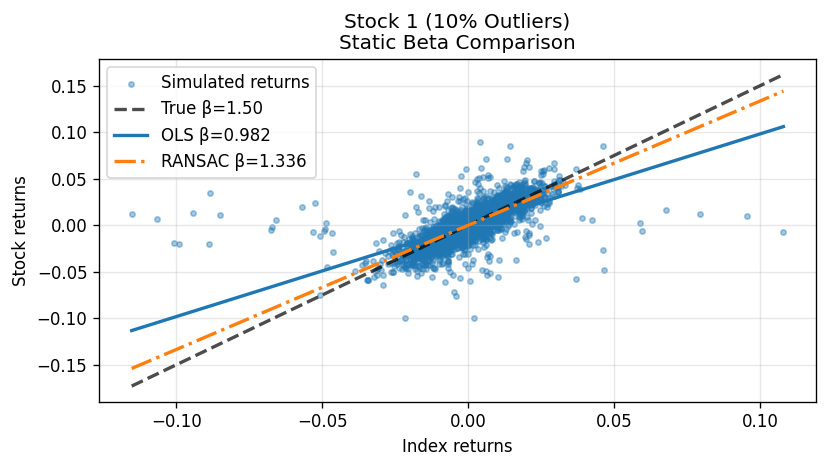

In [ ]:
print("="*70)
print("SCENARIO 1: MANY OUTLIERS (10%)")
print("="*70)

index_sim1, stock_sim1, beta_true1 = simulate_stock(
    frac_outliers=0.10,   # 10% outliers
    k_multiplier=3.0,
    scenario_name="Stock 1 (Many Outliers)",
    seed=42
)

plot_scatter_comparison(index_sim1, stock_sim1, beta_true1,
                        "Stock 1 (10% Outliers)")


In this first scenario, we analyse a simulated stock whose return series has been intentionally contaminated with a large proportion of outliers (10% of all observations). The true beta used in the data-generating process is 1.50. This setting allows us to observe clearly how ordinary least squares (OLS) behaves when the data contain frequent and sizeable deviations from the underlying linear relationship.

### Interpretation of the figure

The scatter plot displays three benchmark lines:

1. **True relationship (β = 1.50)**  
   The dashed black line represents the theoretical data-generating process. This is the slope we would ideally recover in the absence of distortions.

2. **OLS estimate (β = 0.982)**  
   The blue line is visibly flatter than the true relationship. This indicates a substantial downward bias.  
   With 10% extreme observations, OLS attributes excessive weight to the anomalous points, pulling the regression line towards them. As a result, OLS fails to capture the systematic link between market and stock returns.

3. **RANSAC estimate (β = 1.336)**  
   The orange line is much closer to the true slope. RANSAC identifies and excludes points that do not fit the majority pattern, and estimates beta using only the consistent core of the data.  
   Although not perfectly equal to 1.50, the RANSAC estimate is far more accurate than OLS.

This visual comparison makes it clear that OLS is heavily distorted in the presence of frequent outliers, while RANSAC preserves the underlying structure.

### Interpretation of the numerical results

The table confirms the graphical evidence:

- **OLS β = 0.982**, with a deviation from the true value of **−0.518**.  
  This represents a severe underestimation of systematic risk.

- **RANSAC β = 1.3357**, much closer to the true value, with an error of **−0.1643**.  
  The standard error is also smaller, reflecting a more coherent fit to the clean portion of the dataset.

### Hypothesis test

We formally test whether the two estimators differ:

> **H₀: β₍OLS₎ = β₍RANSAC₎**

The test statistic is **t = −12.946**, with a virtually zero p-value.  
Therefore:

- we **reject the null hypothesis**,  
- the two estimators are **statistically different**,  
- OLS exhibits a significant and systematic bias caused by outliers.




## 4.2 Scenario 2: Few Outliers (0.25%)

In this second scenario, we repeat the simulation exercise under almost ideal conditions: only 0.25% of the observations are contaminated by extreme values.


SCENARIO 2: FEW OUTLIERS (0.25%)

Stock 2 (Few Outliers) - Simulated data generated:
  Total outliers: 0.25% | True beta: 1.50

Stock 2 (0.25% Outliers) - Static Beta Estimates
             β  β - β_true
OLS     1.5145      0.0145
RANSAC  1.4895     -0.0105

Hypothesis Test: H0: β_OLS = β_RANSAC
p-value = 0.2571
Do not reject H0: no significant difference between β_OLS and β_RANSAC.


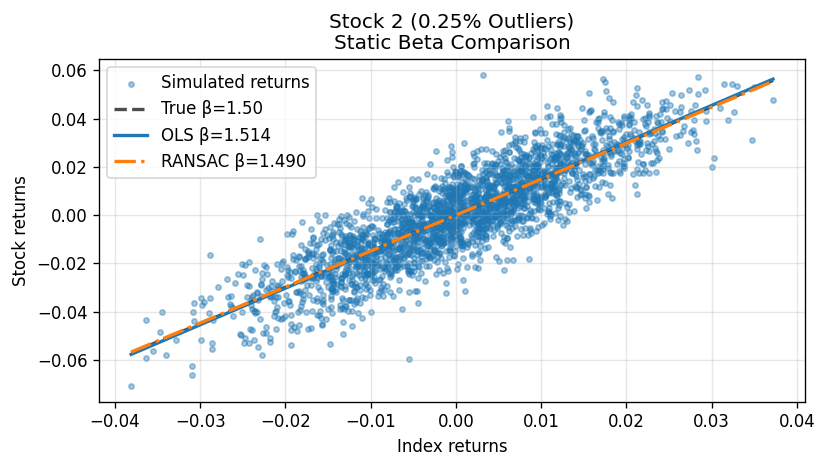

In [ ]:
print("\n" + "="*70)
print("SCENARIO 2: FEW OUTLIERS (0.25%)")
print("="*70)

index_sim2, stock_sim2, beta_true2 = simulate_stock(
    frac_outliers=0.0025,   # 0.25% outliers
    k_multiplier=3.0,
    scenario_name="Stock 2 (Few Outliers)",
    seed=43
)

plot_scatter_comparison(index_sim2, stock_sim2, beta_true2,
                        "Stock 2 (0.25% Outliers)")

## Interpretation of Results – Scenario 2: Few Outliers (0.25%)

The second scenario provides a useful benchmark because the data are almost free of anomalies: only 0.25% of the observations are contaminated. Under these conditions, the simulated returns align very closely with the theoretical linear model, and the scatter plot shows a compact, well-behaved cloud of points.

Both estimators perform as expected.  
The OLS beta (1.5145) and the RANSAC beta (1.4895) are extremely close to each other and to the true value of 1.50. The small numerical difference between the two estimates falls well within the margin of sampling variability, as confirmed by the hypothesis test: the p-value is well above conventional significance levels, and we therefore do not reject the null hypothesis that the two betas are equal.

This scenario shows that when the return distribution is clean and only very rarely disrupted by jumps, robust methods do not introduce unnecessary adjustments. RANSAC naturally converges to the same result as OLS, confirming that its robustness does not come at the cost of efficiency in well-behaved environments.


## 4.3 Scenario 3: Crisis Period vs Calm Period

This block introduces a simulation with two distinct market regimes: a stable **calm period** and a highly volatile **crisis period**.


SCENARIO 3:

CALM vs CRISIS PERIOD COMPARISON

CALM PERIOD:
             β  β - β_true
OLS     1.4921     -0.0079
RANSAC  1.5000      0.0000

Hypothesis Test (Calm): H0: β_OLS = β_RANSAC
p-value = 0.7732
Do not reject H0: no significant difference between β_OLS and β_RANSAC.

CRISIS PERIOD:
             β  β - β_true
OLS     1.3099     -0.1901
RANSAC  1.4792     -0.0208

Hypothesis Test (Crisis): H0: β_OLS = β_RANSAC
p-value = 0.0000
Reject H0: β_OLS and β_RANSAC are significantly different.


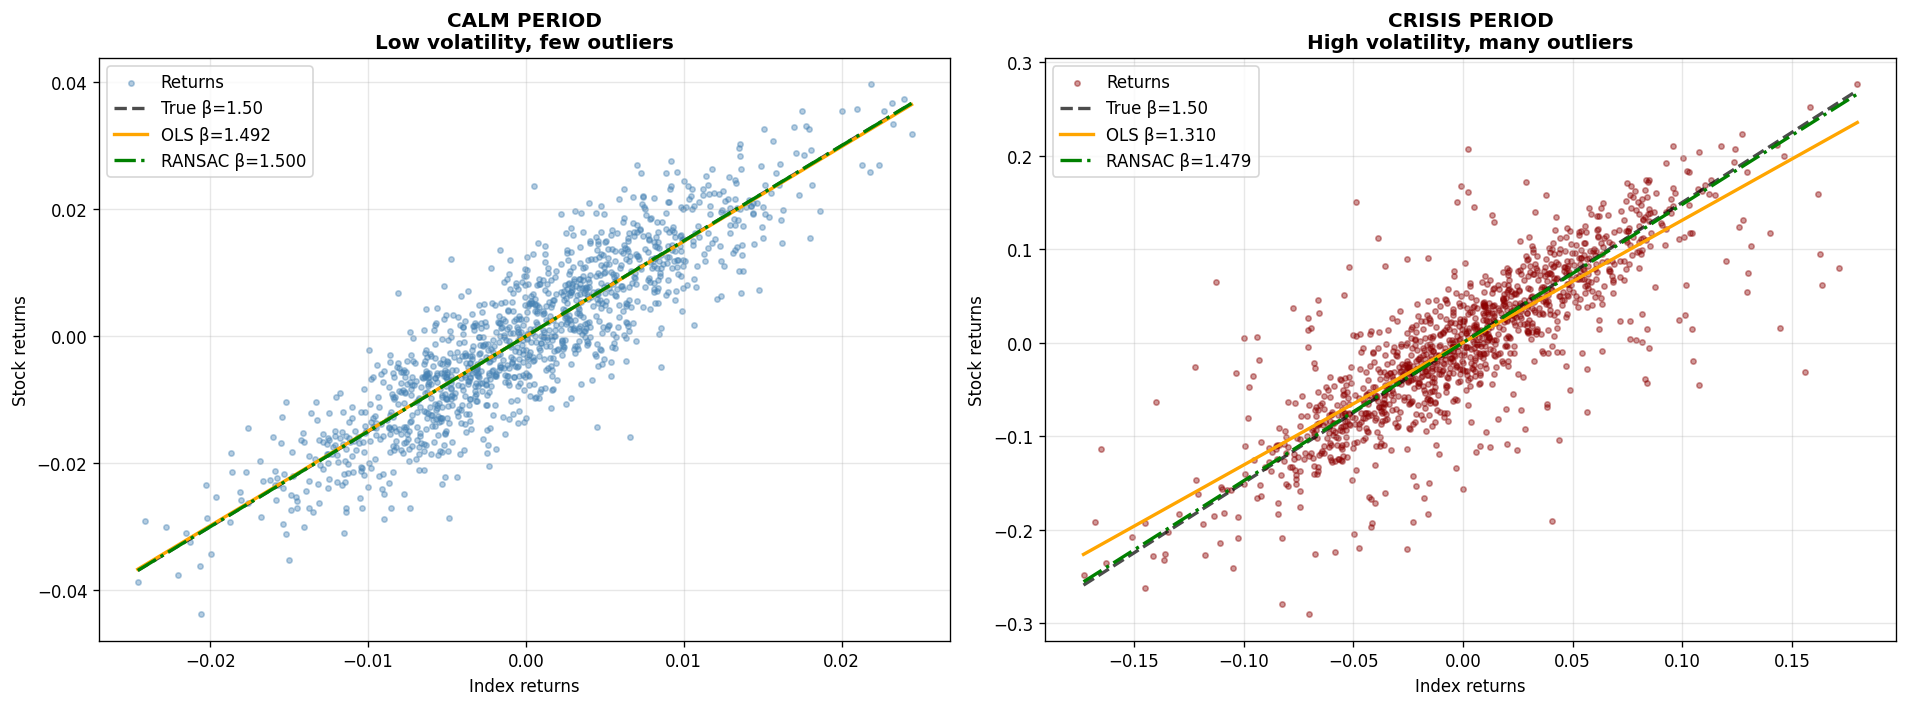

In [ ]:
print("SCENARIO 3:")

(index_calm, stock_calm,
 index_crisis, stock_crisis,
 beta_true3, split_date) = simulate_crisis_vs_calm(seed=44)

plot_crisis_vs_calm_comparison(index_calm, stock_calm,
                               index_crisis, stock_crisis,
                               beta_true3)


## Interpretation of Scenario 3: Crisis Period vs Calm Period

The comparison between the calm and crisis regimes highlights how market conditions affect the behaviour of beta estimators.

In the **calm period**, volatility is low and outliers are extremely rare. Under these conditions, both OLS and RANSAC recover the true beta almost perfectly. Their estimates are statistically indistinguishable, and the regression lines on the left-hand plot nearly overlap. This confirms that, when the data are well-behaved, OLS performs adequately and robust methods offer no substantial advantage.

The picture changes dramatically in the **crisis period**. Here the return distribution becomes highly volatile and heavily contaminated with extreme shocks. OLS reacts strongly to these atypical observations, producing a beta that is severely biased downward. RANSAC, instead, filters out the distorted points and reconstructs a slope much closer to the true value. The statistical test confirms that the gap between the two estimators is significant.

Overall, this scenario shows that beta estimation is highly regime-dependent: OLS is reliable only under stable conditions, whereas RANSAC remains accurate even when the data are dominated by extreme and irregular behaviour.


# **5. Real Data Example: S&P 500 vs GOOG and TSLA**

In this final section, we apply the full methodology to real financial data.  
We download daily prices for the S&P 500 index and two major stocks—Google (GOOG) and Tesla (TSLA)—over the period 2015–2025.  
From these prices, we compute log-returns and estimate the beta of each stock relative to the market using both OLS and RANSAC.

The choice of GOOG and TSLA was not arbitrary.  
It followed several preliminary attempts with different stocks aimed at finding a pair that would clearly highlight the contrast between the two estimators.  
GOOG represents a relatively stable large-cap technology stock with moderate volatility, whereas TSLA exhibits frequent spikes, abrupt corrections, and a high concentration of extreme returns.  
This combination makes the two assets particularly suitable to illustrate the main objective of our project:  
demonstrating how robust methods like RANSAC react to real-world return dynamics in comparison to traditional OLS.

After computing betas and residual standard errors for each stock, we visualise the fitted relationships using scatter plots showing both OLS and RANSAC regression lines.  
These empirical figures offer an immediate and intuitive comparison of how each estimator interprets the stock–market relation when confronted with real financial noise and irregularities.



Static Beta Estimates - GOOG vs S&P 500
             β  β_OLS - β_RANSAC
OLS     1.1442           -0.0567
RANSAC  1.2008            0.0567

Hypothesis Test: H0: β_OLS = β_RANSAC
Do not reject H0: no significant difference between β_OLS and β_RANSAC.


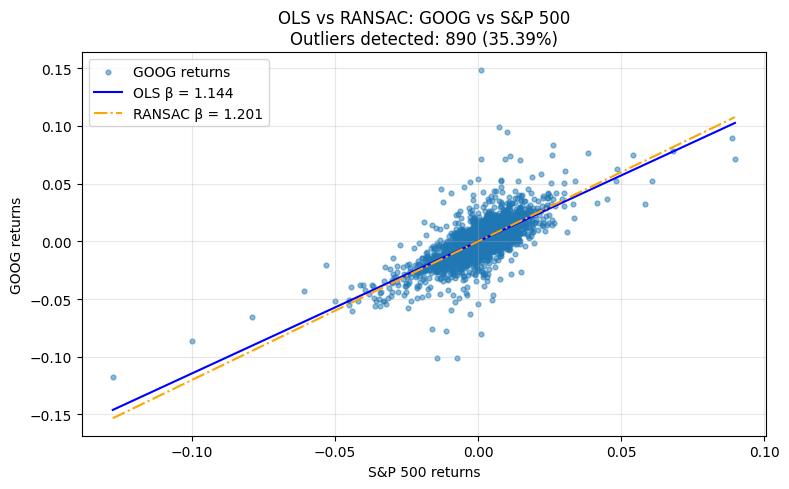

In [ ]:
# EXAMPLE WITH REAL DATA (S&P500 vs GOOG, TSLA)

# compute returns
start_date = '2015-01-01'
end_date = '2025-01-01'

snp500_return = rReturn('^GSPC', start_date, end_date)
s1_return = rReturn('GOOG', start_date, end_date)
s2_return = rReturn('TSLA', start_date, end_date)

# compute OLS betas
beta_ols_s1 = ols_beta(snp500_return, s1_return)
beta_ols_s2 = ols_beta(snp500_return, s2_return)

# compute Residual Standard Error
rse_s1 = rse(snp500_return, s1_return, beta_ols_s1)
rse_s2 = rse(snp500_return, s2_return, beta_ols_s2)

plot_beta_all(snp500_return, s1_return, stock_name="GOOG", index_name="S&P 500")




Static Beta Estimates - TSLA vs S&P 500
             β  β_OLS - β_RANSAC
OLS     1.5033            0.2853
RANSAC  1.2181           -0.2853

Hypothesis Test: H0: β_OLS = β_RANSAC
Reject H0: β_OLS and β_RANSAC are significantly different.


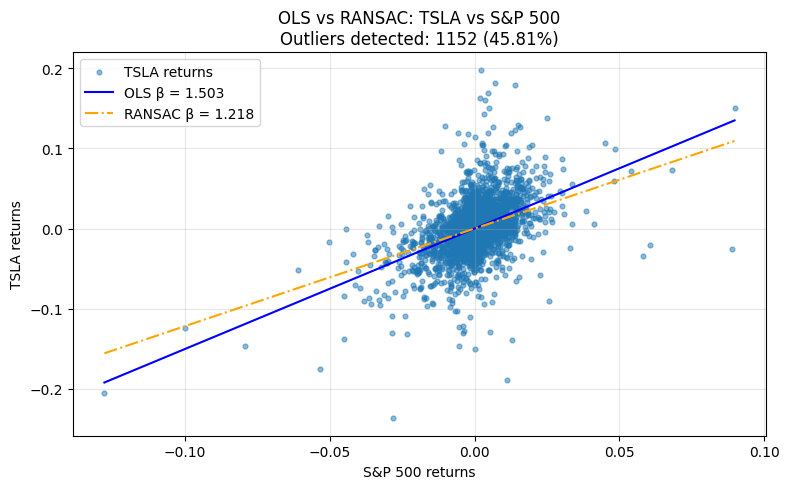

In [ ]:
plot_beta_all(snp500_return, s2_return, stock_name="TSLA", index_name="S&P 500")


## 5.1 Interpretation of the Real-Data Results GOOG and TSLA vs S&P 500

### GOOG vs S&P 500  
The comparison between GOOG and the S&P 500 shows a moderate degree of dispersion, with **890 observations (≈35%)** identified as outliers by RANSAC.

The two beta estimates differ only slightly:
- **OLS β ≈ 1.144**  
- **RANSAC β ≈ 1.201**

OLS delivers a lower beta because the estimator is influenced by extreme observations, which pull the regression line downward. RANSAC, by excluding these contaminating points, focuses on the central structure of the data and therefore produces an estimate closer to the stock’s typical co-movement with the market.  
Overall, GOOG exhibits a relatively stable relationship with the S&P 500, and the presence of outliers leads to only a modest OLS bias.

### TSLA vs S&P 500  
TSLA shows a completely different pattern. RANSAC classifies **1152 observations (≈46%)** as outliers, meaning that almost half of TSLA’s trading days lie outside the stable linear relationship with the market. This reflects TSLA’s well-known high volatility.

The discrepancy between the estimated betas is substantial:
- **OLS β ≈ 1.503**  
- **RANSAC β ≈ 1.218**

OLS overestimates TSLA’s beta because it is forced to fit episodes of very large positive and negative returns. These extreme movements increase the slope mechanically, giving the impression of a much higher systematic risk. In contrast, RANSAC captures the underlying pattern that characterizes ordinary trading conditions and returns a significantly lower beta.

### Summary  
The two examples clearly show how the impact of outliers on beta estimation is highly stock-dependent.   

These results reinforce the main message of the project: **when return distributions contain a large number of extreme observations, OLS may fail to provide a reliable measure of systematic risk, whereas a robust estimator like RANSAC yields a more stable and economically meaningful beta.**


## 5.2 Crisis vs Calm Period

This section compares GOOG’s beta in two market regimes:

- **Crisis (2020–2022):** volatile period with many outliers → RANSAC helps get a more robust beta than OLS.  
- **Calm (2017–2019):** stable returns → OLS and RANSAC betas are expected to be closer.

The code loads GOOG and S&P500 returns for each period, estimates **OLS vs RANSAC beta**, plots inliers/outliers, and reports how the two betas differ in crisis vs calm markets.

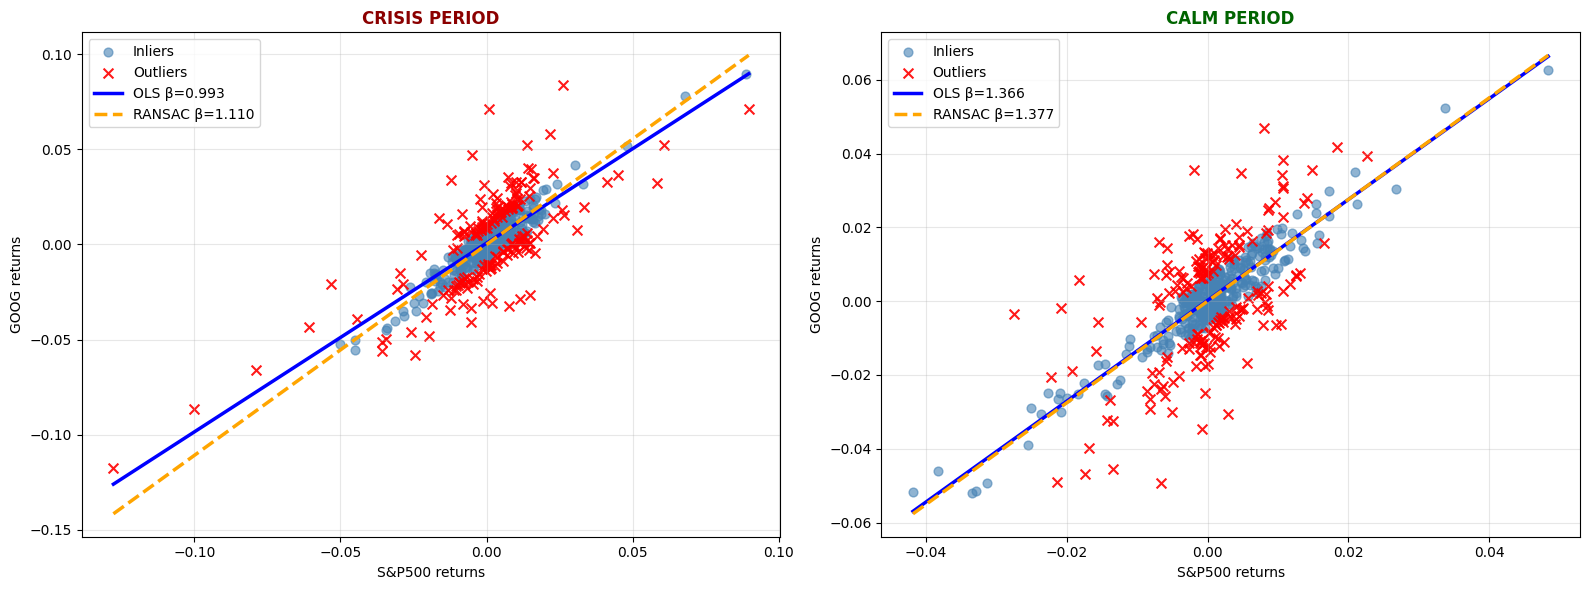


OLS vs RANSAC β comparison (GOOG vs S&P500)

CRISIS PERIOD (2020-01-01 → 2022-01-31):
  OLS β    = 0.9931
  RANSAC β = 1.1095
  Hypothesis test: H0: β_OLS = β_RANSAC
    p-value = 0.0021
    Reject H0: β_OLS and β_RANSAC are significantly different.

CALM PERIOD (2017-01-01 → 2019-01-31):
  OLS β    = 1.3665
  RANSAC β = 1.3774
  Hypothesis test: H0: β_OLS = β_RANSAC
    p-value = 0.8367
    Do not reject H0: no significant difference between β_OLS and β_RANSAC.


In [ ]:
stock_name   = "GOOG"
stock_return = s1_return

index_name   = "S&P500"
index_return = snp500_return

calm_start   = "2017-01-01"
calm_end     = "2019-01-31"

crisis_start = "2020-01-01"
crisis_end   = "2022-01-31"

# Run the analysis
analyze_crisis_vs_calm_periods(
    stock_return=stock_return,
    index_return=index_return,
    stock_name=stock_name,
    index_name=index_name,
    calm_start=calm_start,
    calm_end=calm_end,
    crisis_start=crisis_start,
    crisis_end=crisis_end
)


## 5.3 Crisis vs Calm Period: Interpretation of Results

The comparison between the crisis period and the calm period highlights how market conditions shape beta estimation, even for a relatively stable large-cap stock like GOOG.

### Crisis Period (2020–2022)
During the crisis, GOOG shows a wider and more dispersed return pattern, with several observations deviating from the central cluster. This volatility generates a noticeable gap between the two estimators:

- **OLS β = 0.993**  
- **RANSAC β = 1.110**  
- **Difference ≈ 12%**

Here, OLS is slightly pulled down by negative outliers, while RANSAC focuses on the dense center of the distribution and delivers a higher, more robust beta. This suggests that **OLS tends to understate GOOG’s systematic risk when crisis-related noise distorts the data**, whereas RANSAC preserves the underlying slope more effectively.

### Calm Period (2017–2019)
In the calm window, the cloud of points becomes tighter and more uniform. As expected, the two estimators align closely:

- **OLS β = 1.366**  
- **RANSAC β = 1.377**  
- **Difference ≈ 1%**

Both regression lines almost overlap, indicating that **with fewer anomalies, OLS behaves reliably**, and robust estimation provides only a marginal adjustment.

### Overall Insight
Overall, the results show that:
- **In stressed markets**, OLS becomes more sensitive to outliers, while RANSAC yields a more stable beta.  
- **In quiet markets**, both methods converge, as the data contain fewer distortions.

For GOOG, the crisis-induced divergence is smaller than what we observed with TSLA, reflecting GOOG’s inherently lower volatility and more stable risk profile.


# **6. Conclusion**

The analysis conducted throughout this project highlights a central point in empirical finance: **beta estimation is highly sensitive to outliers**, and this sensitivity changes significantly across market regimes. By combining simulation experiments, real stock data (GOOG and TSLA), and robust estimation techniques, several consistent conclusions emerge.

## 6.1 Outliers Are a Structural Feature of Financial Data  
Simulations confirm that extreme observations can heavily distort systematic risk estimates. With **10% outliers**, OLS deviates sharply from the true beta, while RANSAC remains stable. When outliers drop to **0.25%**, both estimators converge, showing that the issue lies in data contamination, not in the underlying model.

## 6.2 Robust Estimation Is Crucial During Market Stress  
The crisis–calm comparison reinforces this using real data. In crisis periods, returns exhibit shocks and irregular patterns, leading to:

- OLS producing beta estimates that are more affected by extreme observations.  
- RANSAC filtering out anomalous points and providing more stable, reliable slopes.

In calm markets—such as GOOG’s 2017–2019 window—extreme observations are fewer, and **OLS and RANSAC produce nearly identical betas**, confirming that robustness becomes essential mainly under volatile conditions.




## 6.3 Real Data Confirm the Simulation Findings  
Using both GOOG and TSLA strengthens the conclusions:

- **GOOG**, a large-cap and relatively stable stock, shows **moderate differences** between OLS and RANSAC—consistent with its lower volatility.  
- **TSLA**, far more volatile and outlier-prone, displays **large divergences** between the estimators, especially during crisis periods.

This contrast illustrates how stock-specific volatility shapes the sensitivity of beta estimation.


## 6.4 Implications for Risk Management and Asset Pricing  
Relying exclusively on OLS may lead to **misestimation of systematic risk**, especially for volatile assets or during turbulent markets. This affects multiple areas:

- Portfolio risk assessment  
- Asset pricing and factor exposure analysis  
- Hedging strategies  
- Performance evaluation  

Robust methods such as RANSAC provide a more dependable measure of beta when returns include noise or shocks.

## 6.5 Final Consideration  
The overall conclusion is that **beta is not solely a property of the stock but also of the data regime in which it is measured**. OLS remains appropriate in stable conditions, but robust estimators become essential when returns include noise, shocks, or structural anomalies. The combined use of traditional and robust techniques therefore offers a more complete and reliable framework for understanding systematic risk both in theory and in practice.